# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Marius Stumpe

Datum: 18.11.2023

Gruppe: 2

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie lange dauert es, bis sich sich eine Mischungstemperatur einstellt?

Ist die Mischungstemperatur genau der Mittelwert der beiden Wassertemperaturen, wenn man die gleichen Wassermengen mischt?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Ich habe in einen Topf 200 ml kaltes Wasser und in ein Glas 200 ml heißes Wasser gefüllt. Zu dem kalten Wasser habe ich Sensor 1 und zu dem heißen Wasser Sensor 2 gegeben. Anschließend habe ich die Messung gestartet und nach kurzem Warten das heiße Wasser zusammen mit Sensor 2 zu dem kalten Wasser geschüttet. Danach habe ich etwas gewartet, bis beide Sensoren ungefähr die gleiche Temperatur anzeigten und schließlich die Messung beendet.

<img src="figures/heat_capacity.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path_hdf5_heat_capacity = "data/heat_capacity/heat_capacity.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

import h5py
sensor_temperature = []
sensor_time = []

hdf5_heat_capacity = h5py.File(path_hdf5_heat_capacity, "r")

for UUID in m_json.get_metadata_from_setup("datasheets/setup_heat_capacity.json")["sensor"]["values"]:
    sensor_temperature.append(np.array(hdf5_heat_capacity["RawData"][UUID]["temperature"]))
    sensor_time.append(np.array(hdf5_heat_capacity["RawData"][UUID]["time"]))

attributes_rawdata = []
for keys_rawdata in hdf5_heat_capacity.attrs.keys():
    attributes_rawdata.append(keys_rawdata + ": " + hdf5_heat_capacity.attrs[keys_rawdata])
print(attributes_rawdata)

attributes_sensors = []
for UUID in m_json.get_metadata_from_setup("datasheets/setup_heat_capacity.json")["sensor"]["values"]:
    for keys_sensors in hdf5_heat_capacity["RawData"][UUID].attrs.keys():
        attributes_sensors.append(keys_sensors + ": " + hdf5_heat_capacity["RawData"][UUID].attrs[keys_sensors])
print(attributes_sensors)

attributes_time = []
for keys_time in hdf5_heat_capacity["RawData"][UUID]["time"].attrs.keys():
    attributes_time.append(keys_time + ": " + hdf5_heat_capacity["RawData"][UUID]["time"].attrs[keys_time])
# Die "time" Attribute sind bei beiden Sensoren gleich.
print(attributes_time)

hdf5_heat_capacity.close()
# DONE #

['authors: Marius Stumpe', 'created: 17.11.2023', 'experiment: calorimetry_home', 'group_number: 2']
['name: temperature_cup', 'serial: 3ce504575fd8', 'name: temperature_environment', 'serial: 3ce1e3802a87']
['the_epoch: Donnerstag, der 1. Januar 1970, 00:00 Uhr UTC', 'time_convention: Unixzeit', 'time_explanation: Die Unixzeit zaehlt die vergangenen Sekunden seit The Epoch']


#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


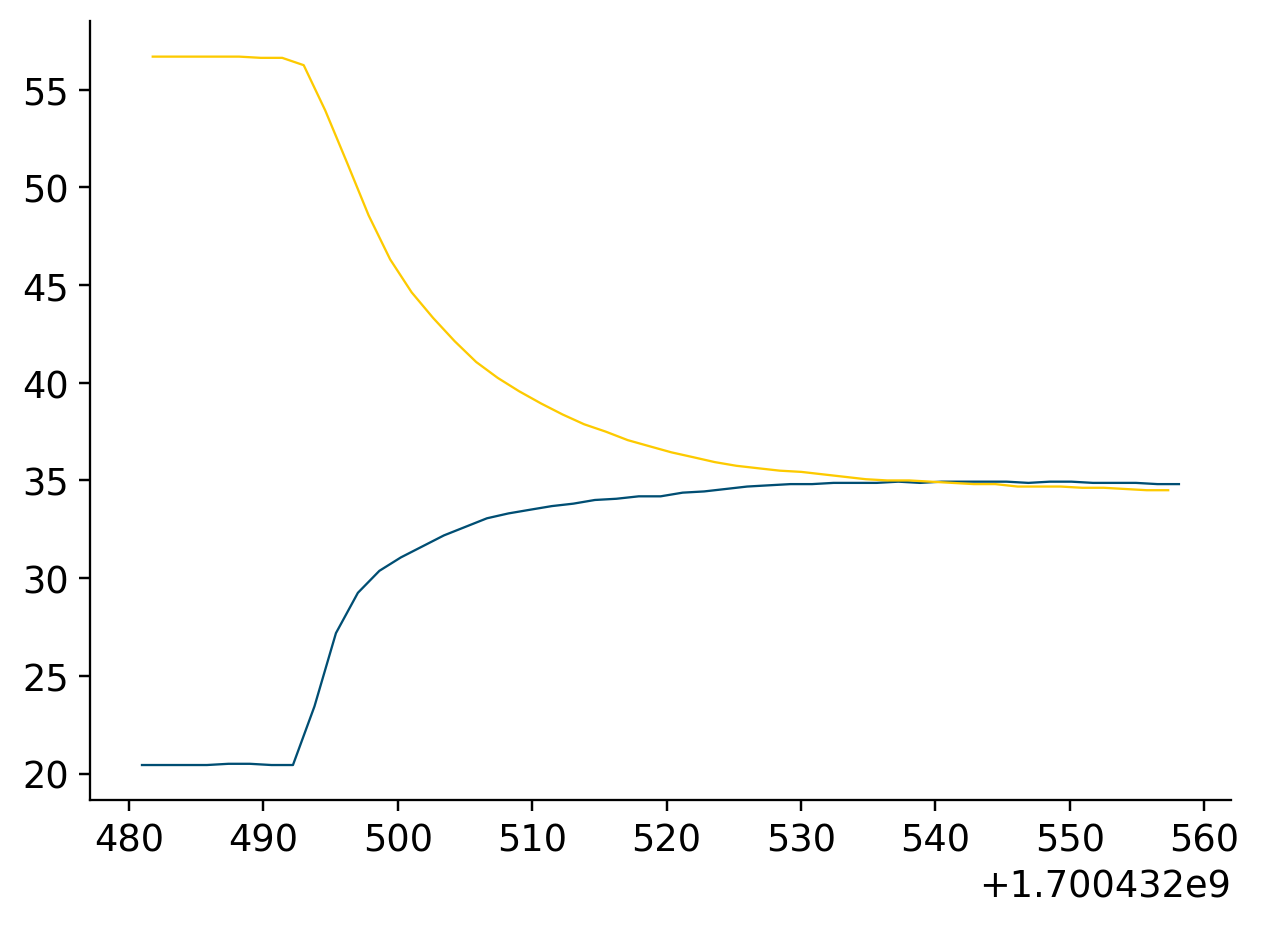

In [4]:
# TODO: Use the temperature and time data for plotting

plt.plot(sensor_time[0], sensor_temperature[0])
plt.plot(sensor_time[1], sensor_temperature[1])

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.

probe_id = m_json.get_metadata_from_setup("datasheets/setup_heat_capacity.json")["probe"]["values"][0]

mass_cup = m_json.get_json_entry("datasheets", probe_id,["probe", "metadata", "mass_cup"])
mass_add = m_json.get_json_entry("datasheets", probe_id,["probe", "metadata", "mass_add"])

# DONE #

#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_1 = sensor_temperature[0][0]
temperature_2 = sensor_temperature[1][0]
temperature_mix = sensor_temperature[0][len(sensor_temperature[0])-1]
# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter

heat_capacity_calorimeter = ((mass_add*water_heat_capa*(temperature_2-temperature_mix))/(temperature_mix-temperature_1))-(mass_cup*water_heat_capa)

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result

print("Die Wärmekapazität des Kalorimeters beträgt " + str(heat_capacity_calorimeter) + " Kilojoule/Kelvin")

# DONE #

Die Wärmekapazität des Kalorimeters beträgt 0.4361739130434782 Kilojoule/Kelvin


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaftlicher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Nach den Vermischen der beiden Wassermassen stellt sich nach ca. 43 Sekunden eine Mischungstemperatur ein. Diese entspricht jedoch nicht genau dem Mittelwert der beiden Wassertemperaturen, obwohl vom heißen und vom kalten Wasser die gleiche Menge verwendet wurde. Stattdessen ist die Mischtemperatur ca. 3.5 Grad Celsius kälter als der Mittelwert der Wassertemperaturen. Dies liegt vorallem daran, dass das Kalorimeter nicht perfekt isoliert ist und somit auch Wärme an den Topf und die Umgebung abgegeben wurde. Je besser isoliert das Kalorimeter ist, umso kleiner ist auch seine Wärmekapazität. Wäre es in der Theorie perfekt isoliert, würde seine Wärmekapazität Null betragen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Versuch hat mir gut gefallen, da es interessant war zu sehen, wie viel Einfluss das Kalorimeter auf die Mischtemperatur hat. Zudem habe ich gelernt, was die Wärmekapazität eines Kalorimeters überhaupt aussagt, was ich zu Beginn des Versuchs noch nicht verstanden hatte.